In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import re



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
twiter_reviews = pd.read_csv('Elon_musk.csv', encoding = 'ISO-8859-1')
twiter_reviews = twiter_reviews.Text
twiter_reviews

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
reviews = [Details for Details in twiter_reviews if Details]
reviews[0:]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
len(reviews)

1999

In [7]:
filter = [item for item in reviews if not isinstance(item, float)]


In [8]:
reviews_text = ' '.join(filter)

In [9]:
reviews_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
sent = nltk.sent_tokenize(reviews_text)

In [11]:
len(sent)

927

In [12]:
sent[3]

'@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.'

In [13]:
corpus = []
for i in range(len(sent)):
  txt = re.sub('[^a-zA-Z]', ' ', sent[i])
  txt = txt.lower()
  corpus.append(txt)

In [14]:
corpus

[' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level ',
 'have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year ',
 'now on to the next for even more  ',
 'happy new year of the ox ',
 'https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all ',
 'https   t co zgxjfdzzrm  owensparks   flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed ',
 'tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my accou

In [15]:
# stemming

stemmer = PorterStemmer()

In [16]:
for i in corpus:
  words = nltk.word_tokenize(i)
  print(words)

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level']
['have', 'you', 'tried', 'it']
['joerogan', 'spotify', 'great', 'interview']
['gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year']
['now', 'on', 'to', 'the', 'next', 'for', 'even', 'more']
['happy', 'new', 'year', 'of', 'the', 'ox']
['https', 't', 'co', 'wfkmyu', 'oj', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all']
['https', 't', 'co', 'zgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'thanks', 'flcnhvy', 'anonyx', 'indeed']
['tweets', 'definitely', 'do', 'not', 'represent', 'real', 'world', 'time', 'allocation']
['the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'givedirectly', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'kanyewest', 'https', 't', 'co'

In [17]:
for i in corpus:
  words = nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(stemmer.stem(i))


Streaming output truncated to the last 5000 lines.
aa
carmack
later
version
larger
devic
would
potenti
evafoxu
waitbutwhi
yup
ppathol
id
aa
carmack
actual
c
although
syntax
could
improv
esthet
id
aa
carmack
like
c
avoid
class
warfar
ppathol
ieeespectrum
neuralink
nightcap
would
probabl
work
best
ieeespectrum
neuralink
pretti
much
tesmanian
com
good
summari
conceptu
telepathi
rt
waitbutwhi
ever
fantas
engin
work
edison
lab
appli
work
neuralink
ahem
start
soon
http
co
ecghh
ston
physic
either
imposs
trivial
imposs
understand
becom
trivial
e
rutherford
flcnhvi
giant
gap
experiment
medic
devic
use
patient
extrem
medic
problem
amp
wid
http
co
f
fib
w
z
tobyliiiiiiiiii
erdayastronaut
flcnhvi
djsnm
test
shorter
rvac
skirt
went
well
full
length
skirt
test
come
soon
neuralink
product
demo
hour
webcast
http
co
wred
oj
erdayastronaut
flcnhvi
djsnm
raptor
reach
mt
f
half
million
pound
thrust
peak
pressur
wit
http
co
spnwbelpa
nextspaceflight
good
chanc
someth
slip
yeah
sunday
intens
erdayastronaut

In [18]:
# lemmatization

lemma = WordNetLemmatizer()


In [19]:
for i in corpus:
  words = nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(lemma.lemmatize(i))

Streaming output truncated to the last 5000 lines.
aa
carmack
later
version
larger
device
would
potential
evafoxu
waitbutwhy
yup
ppathole
id
aa
carmack
actually
c
although
syntax
could
improved
esthetically
id
aa
carmack
like
c
avoids
class
warfare
ppathole
ieeespectrum
neuralink
nightcap
would
probably
work
best
ieeespectrum
neuralink
pretty
much
tesmanian
com
good
summary
conceptual
telepathy
rt
waitbutwhy
ever
fantasize
engineer
working
edison
lab
apply
work
neuralink
ahem
starting
soon
http
co
ecghh
ston
physic
either
impossible
trivial
impossible
understand
becomes
trivial
e
rutherford
flcnhvy
giant
gap
experimental
medical
device
use
patient
extreme
medical
problem
amp
wid
http
co
f
fib
w
z
tobyliiiiiiiiii
erdayastronaut
flcnhvy
djsnm
testing
shorter
rvac
skirt
went
well
full
length
skirt
test
coming
soon
neuralink
product
demo
hour
webcast
http
co
wred
oj
erdayastronaut
flcnhvy
djsnm
raptor
reached
mt
f
half
million
pound
thrust
peak
pressure
wit
http
co
spnwbelpa
nextspacefligh

Feature Extraction


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
cv = CountVectorizer()

In [22]:
x = cv.fit_transform(corpus)
cv.vocabulary_

{'kunalb': 2562,
 'an': 182,
 'alien': 141,
 'id': 2194,
 'aa': 0,
 'carmack': 671,
 'ray': 3817,
 'tracing': 4886,
 'on': 3281,
 'cyberpunk': 1036,
 'with': 5345,
 'hdr': 2029,
 'is': 2361,
 'next': 3137,
 'level': 2652,
 'have': 2017,
 'you': 5496,
 'tried': 4908,
 'it': 2369,
 'joerogan': 2443,
 'spotify': 4418,
 'great': 1934,
 'interview': 2334,
 'gtera': 1953,
 'doge': 1231,
 'underestimated': 5015,
 'teslacn': 4693,
 'congratulations': 908,
 'tesla': 4689,
 'china': 768,
 'for': 1712,
 'amazing': 170,
 'execution': 1516,
 'last': 2597,
 'year': 5474,
 'now': 3193,
 'to': 4834,
 'the': 4745,
 'even': 1485,
 'more': 3022,
 'happy': 1999,
 'new': 3134,
 'of': 3249,
 'ox': 3373,
 'https': 2153,
 'co': 827,
 'wfkmyu': 5281,
 'oj': 3269,
 'frodo': 1758,
 'was': 5235,
 'underdoge': 5014,
 'all': 144,
 'thought': 4792,
 'he': 2031,
 'would': 5380,
 'fail': 1560,
 'himself': 2086,
 'most': 3029,
 'zgxjfdzzrm': 5538,
 'owensparks': 3368,
 'flcnhvy': 1680,
 'anonyx': 203,
 'haha': 1978,
 '

In [23]:
x[0].toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [24]:
corpus[0]

' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level '

In [25]:
x = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
x

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,about,above,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF - IDF

In [26]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)

In [27]:
x.toarray()

array([[0.23628305, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
x = pd.DataFrame(x.toarray(), columns = tf.get_feature_names_out())
x

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,about,above,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.236283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
924,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
925,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
x.shape

(927, 5572)

In [30]:
tf.get_feature_names_out()

array(['aa', 'aayypcpp', 'ab', ..., 'zynsxisp', 'zz', 'zzcool'],
      dtype=object)

In [31]:
len(tf.get_feature_names_out())


5572

NER and Word_Cloud

In [32]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.0 which is incompatible.


In [33]:
!python -m spacy download en_core_web_sm

2023-08-06 12:08:09.384642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 12:08:10.892911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import spacy
from spacy import displacy

In [35]:
corpus1 = [ ]

for i in range(len(sent)):
  txt = re.sub('[^a-zA-Z]', ' ', sent[i])
  txt = txt.lower()
  corpus1.append(txt)

In [36]:
txt = corpus1
txt

[' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level ',
 'have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year ',
 'now on to the next for even more  ',
 'happy new year of the ox ',
 'https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all ',
 'https   t co zgxjfdzzrm  owensparks   flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed ',
 'tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my accou

In [37]:
nlp = spacy.load('en_core_web_sm')


In [38]:
x = nlp(reviews_text)
x

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [64]:
import re

def remove_urls_and_mentions(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'

    # Regular expression pattern to match "@" symbols
    mention_pattern = r'@[\w_]+'

    # Replace URLs and "@" mentions with an empty string
    cleaned_text = re.sub(url_pattern, '', text)
    cleaned_text = re.sub(mention_pattern, '', cleaned_text)

    return cleaned_text



# Remove URLs and "@" mentions from the text
cleaned_text = remove_urls_and_mentions(reviews_text)


print("Text without URLs and mentions:", cleaned_text)


Text without URLs and mentions:  Im an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,
All thought he would fail,
Himself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mis

In [53]:
import unicodedata

def remove_unicode_characters(text):
    cleaned_text1 = ''.join(char for char in text if unicodedata.category(char) != 'So')
    return cleaned_text1



# Remove Unicode characters
cleaned_text1 = remove_unicode_characters(cleaned_text)

print("Original text:", cleaned_text)
print("Text without Unicode characters:", cleaned_text1)


Original text:  Im an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,
All thought he would fail,
Himself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes    O

In [78]:
import emoji

def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text


cleaned_text2 = remove_emojis(cleaned_text1)
print(cleaned_text2)


Im an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge, All thought he would fail, Himself most of all. Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923> This is true power haha Any crypto wallet that wont give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes Once we can predict cash flow reasonably well, 

In [81]:
import re
import unicodedata

def remove_unicode_escapes(text):
    # Regular expression pattern to match Unicode escape sequences
    pattern = r'<U\+[0-9A-Fa-f]+>'

    # Replace Unicode escape sequences with an empty string
    cleaned_text = re.sub(pattern, '', text)

    # Remove any extra spaces resulting from the replacements
    cleaned_text = ' '.join(cleaned_text.split())

    return cleaned_text

cleaned_text3 = remove_unicode_escapes(cleaned_text2)
print(cleaned_text3)


Im an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! Frodo was the underdoge, All thought he would fail, Himself most of all. Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account This is true power haha Any crypto wallet that wont give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! Yes Once we can predict cash flow reasonably well, Starlink will IPO Starlin

In [82]:
x = nlp(cleaned_text3)

In [83]:
displacy.render(x, style='ent', jupyter = True)

In [84]:
for i in x:
  print(i, i.pos_)

Streaming output truncated to the last 5000 lines.
& CCONJ
amp PROPN
; PUNCT
sup PROPN
No PROPN
& CCONJ
amp PROPN
; PUNCT
not PART
possible ADJ
at ADP
this DET
scale NOUN
Orbital ADJ
launch NOUN
mount NOUN
Yeah INTJ
. PUNCT
Occasional ADJ
flights NOUN
from ADP
land NOUN
are AUX
ok ADJ
, PUNCT
but CCONJ
frequent ADJ
( PUNCT
daily ADJ
) PUNCT
flights NOUN
probably ADV
need VERB
~30 PUNCT
km NOUN
/ SYM
18 NUM
m NOUN
Sure ADJ
On ADP
it PRON
I PRON
tried VERB
to PART
warn VERB
them PRON
, PUNCT
but CCONJ
they PRON
just ADV
dug VERB
their PRON
own ADJ
grave NOUN
twice ADV
as ADV
fast ADV
! PUNCT
400 NUM
Wh PROPN
/ NOUN
kg PROPN
* PUNCT
with ADP
* PUNCT
high ADJ
cycle NOUN
life NOUN
, PUNCT
produced VERB
in ADP
volume NOUN
( PUNCT
not PART
just ADV
a DET
lab NOUN
) PUNCT
is AUX
not PART
far ADJ
. PUNCT
Probably ADV
3 NUM
to PART
4 NUM
years NOUN
. PUNCT
Starship NOUN
/ SYM
Super PROPN
Heavy PROPN
, PUNCT
which PRON
is AUX
~10X PUNCT
mass NOUN
of ADP
Zenit PROPN
, PUNCT
will AUX
mostly ADV
lau

Word Cloud

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [86]:
stop = STOPWORDS

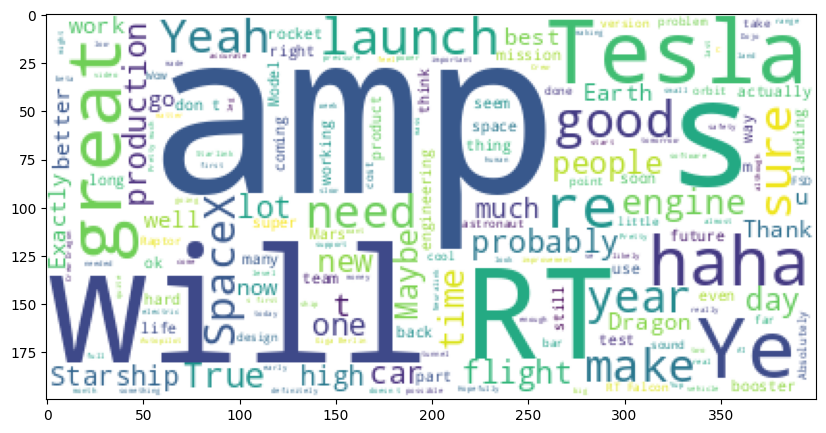

In [87]:
wc = WordCloud(background_color = 'white', stopwords = stop).generate(cleaned_text3)
plt.figure(figsize=(10,5))
plt.imshow(wc)